<a href="https://colab.research.google.com/github/MikeIV2007/DS_HW_10/blob/main/DS_HW_10_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Частина 2**

В цій частині ми знову будемо працювати з датасетом fasion_mnist.



На відміну від попереднього завдання вам пропонується створити згорткову нейромережу, що використовує VGG16 в якості згорткової основи.



Навчіть отриману мережу на даних із датасету fasion_mnist. Спробуйте досягти максимально можливої точності класифікації за рахунок маніпуляції параметрами мережі. Під час навчання використовуйте прийоми донавчання та виділення ознак.



Порівняйте точність отриманої згорткової мережі з точністю багатошарової мережі з попереднього завдання. Зробіть висновки.

# Version 1

4422102/4422102 [==============================] - 0s 0us/step


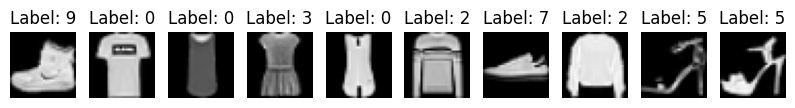

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14781642 (56.39 MB)
Trainable params: 66954 (261.54 KB)
Non-trainable params: 14714688 (56.13 MB)
___________

In [ ]:
#Version 1

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import numpy as np
from PIL import Image

tf.config.optimizer.set_jit(True)

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Function to resize images and convert to RGB format
def resize_images(images):
    resized_images = []
    for img in images:
        # Resize the image to 32x32 using bilinear interpolation
        img_resized = np.array(Image.fromarray(img).resize((32, 32), Image.BILINEAR))
        # Convert grayscale to RGB format by replicating the single channel
        img_rgb = np.repeat(img_resized[:, :, np.newaxis], 3, axis=2)
        resized_images.append(img_rgb)
    return np.array(resized_images)

# Upscale training and test images
x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

# Display any 10 photos from x_train_resized
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_resized[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.axis('off')  # Turn off axis
    plt.title(f'Label: {y_train[i]}')  # Display label of the image
plt.show()

# Load VGG16 model (excluding top layers)
vgg16= VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = False

# Build the model
model = tf.keras.Sequential([
   vgg16,
   layers.Flatten(),
   layers.Dense(128, activation="relu"),
   Dropout(0.2),
   layers.Dense(10, activation="softmax"),
])
model.summary()

Epoch 1/50
235/235 [==============================] - 20s 45ms/step - loss: 0.7752 - accuracy: 0.7364 - val_loss: 0.5179 - val_accuracy: 0.8177
Epoch 2/50
235/235 [==============================] - 12s 51ms/step - loss: 0.4975 - accuracy: 0.8228 - val_loss: 0.4571 - val_accuracy: 0.8349
Epoch 3/50
235/235 [==============================] - 6s 27ms/step - loss: 0.4485 - accuracy: 0.8380 - val_loss: 0.4409 - val_accuracy: 0.8366
Epoch 4/50
235/235 [==============================] - 6s 27ms/step - loss: 0.4198 - accuracy: 0.8466 - val_loss: 0.4133 - val_accuracy: 0.8480
Epoch 5/50
235/235 [==============================] - 6s 27ms/step - loss: 0.4009 - accuracy: 0.8536 - val_loss: 0.4014 - val_accuracy: 0.8528
Epoch 6/50
235/235 [==============================] - 6s 27ms/step - loss: 0.3854 - accuracy: 0.8598 - val_loss: 0.3981 - val_accuracy: 0.8555
Epoch 7/50
235/235 [==============================] - 7s 29ms/step - loss: 0.3731 - accuracy: 0.8644 - val_loss: 0.3863 - val_accuracy: 0.85

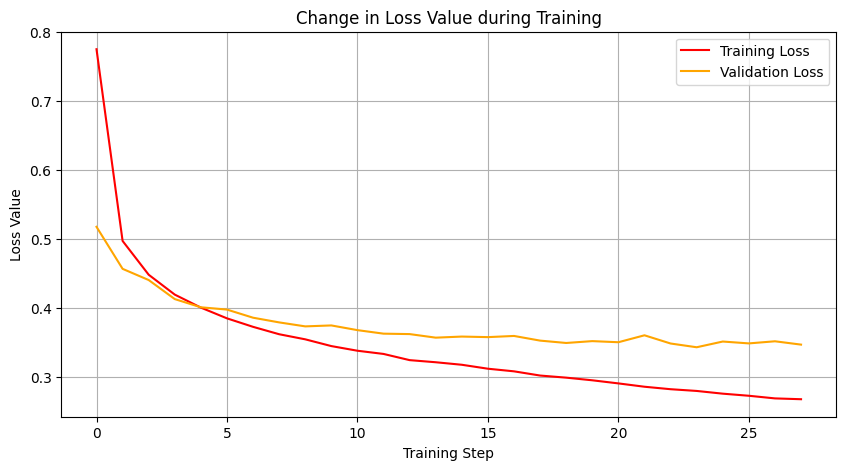

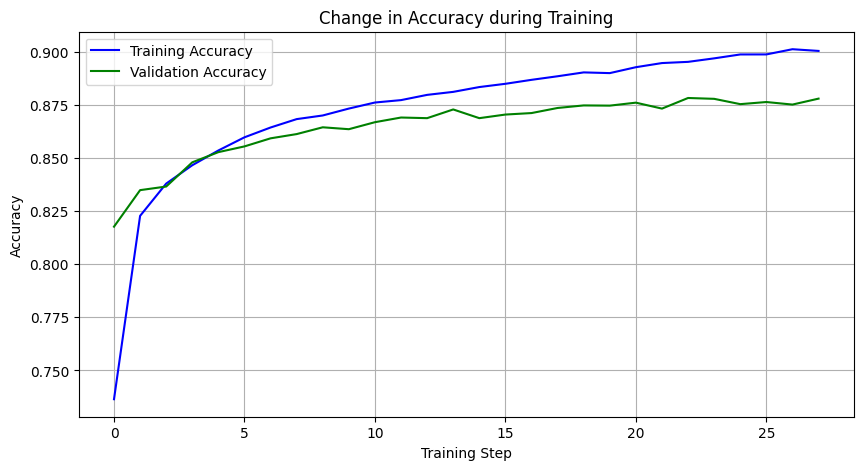

1875/1875 [==============================] - 17s 9ms/step - loss: 0.2507 - accuracy: 0.9097
Train accuracy: 0.909683346748352
313/313 [==============================] - 2s 7ms/step - loss: 0.3489 - accuracy: 0.8783
Test accuracy: 0.8783000111579895


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train_resized, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test_resized, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train_resized, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_acc}')

# Version 2

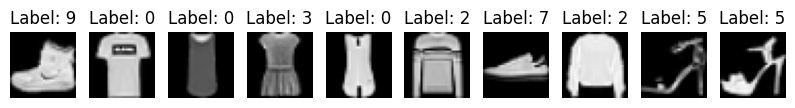

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1

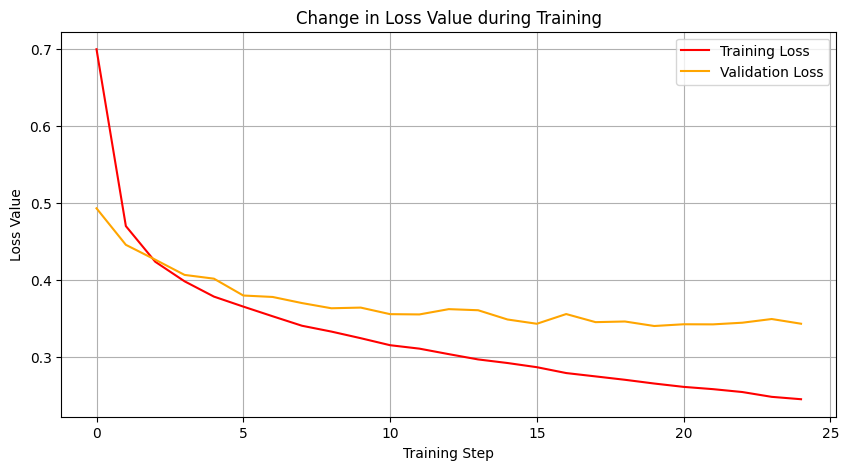

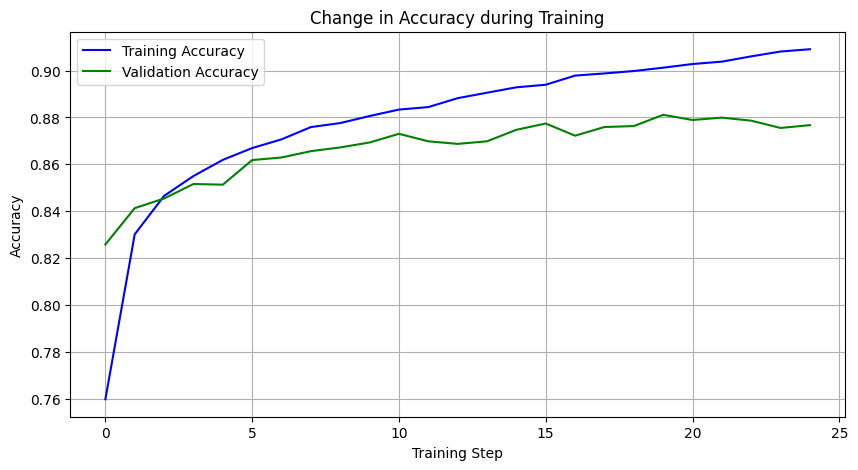

1875/1875 [==============================] - 15s 8ms/step - loss: 0.2359 - accuracy: 0.9137
Train accuracy: 0.9136833548545837
313/313 [==============================] - 2s 7ms/step - loss: 0.3407 - accuracy: 0.8811
Test accuracy: 0.8810999989509583


In [ ]:
#Version 2. Dense Layer neurons increased from 128 to 256

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import numpy as np
from PIL import Image

tf.config.optimizer.set_jit(True)

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Function to resize images and convert to RGB format
def resize_images(images):
    resized_images = []
    for img in images:
        # Resize the image to 32x32 using bilinear interpolation
        img_resized = np.array(Image.fromarray(img).resize((32, 32), Image.BILINEAR))
        # Convert grayscale to RGB format by replicating the single channel
        img_rgb = np.repeat(img_resized[:, :, np.newaxis], 3, axis=2)
        resized_images.append(img_rgb)
    return np.array(resized_images)

# Upscale training and test images
x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

# Display any 10 photos from x_train_resized
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_resized[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.axis('off')  # Turn off axis
    plt.title(f'Label: {y_train[i]}')  # Display label of the image
plt.show()

# Load VGG16 model (excluding top layers)
vgg16= VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = False

# Build the model
model = tf.keras.Sequential([
   vgg16,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   Dropout(0.2),
   layers.Dense(10, activation="softmax"),
])
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train_resized, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test_resized, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train_resized, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_acc}')

# Version 3

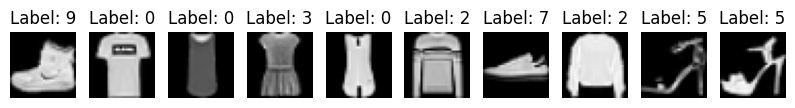

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dense_5 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Epoch 1/50
235/235 [==============================] - 9s 32ms/step - loss: 0.6536 - accuracy: 0.7795 - val_loss: 0.4965 - val_accuracy: 0.8

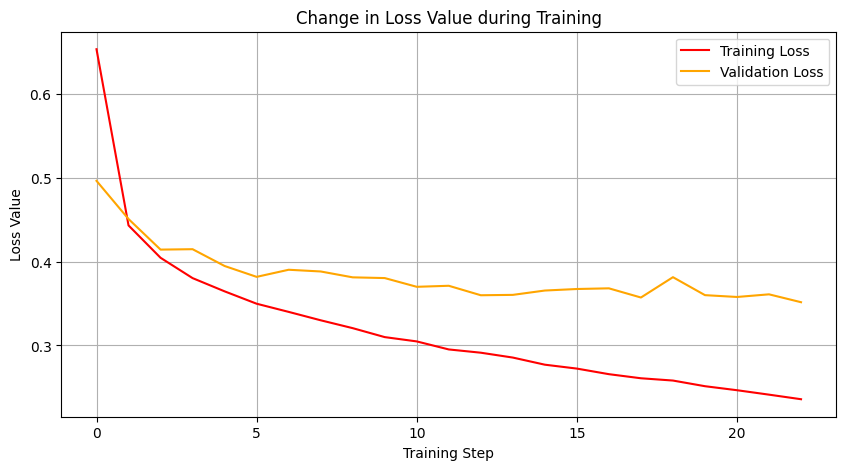

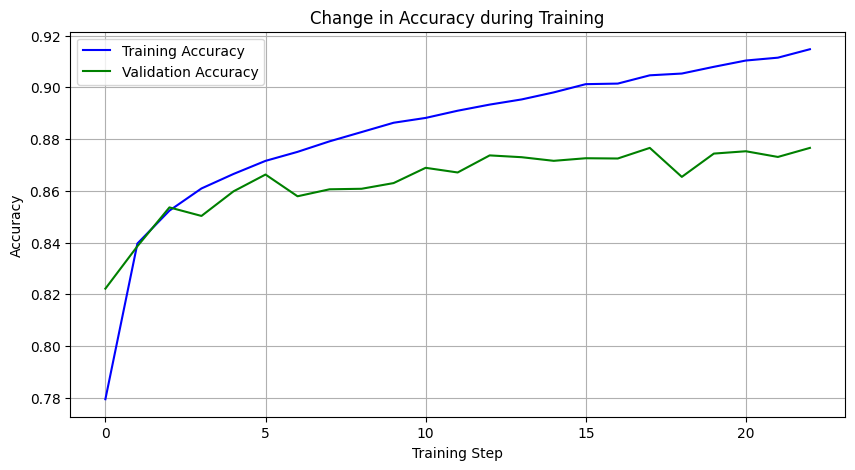

1875/1875 [==============================] - 14s 7ms/step - loss: 0.2518 - accuracy: 0.9077
Train accuracy: 0.9077000021934509
313/313 [==============================] - 2s 7ms/step - loss: 0.3572 - accuracy: 0.8766
Test accuracy: 0.8766000270843506


In [ ]:
#Version 3. Dropuot layer removed

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import numpy as np
from PIL import Image

tf.config.optimizer.set_jit(True)

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Function to resize images and convert to RGB format
def resize_images(images):
    resized_images = []
    for img in images:
        # Resize the image to 32x32 using bilinear interpolation
        img_resized = np.array(Image.fromarray(img).resize((32, 32), Image.BILINEAR))
        # Convert grayscale to RGB format by replicating the single channel
        img_rgb = np.repeat(img_resized[:, :, np.newaxis], 3, axis=2)
        resized_images.append(img_rgb)
    return np.array(resized_images)

# Upscale training and test images
x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

# Display any 10 photos from x_train_resized
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_resized[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.axis('off')  # Turn off axis
    plt.title(f'Label: {y_train[i]}')  # Display label of the image
plt.show()

# Load VGG16 model (excluding top layers)
vgg16= VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
vgg16.trainable = False

# Build the model
model = tf.keras.Sequential([
   vgg16,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(10, activation="softmax"),
])
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train_resized, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test_resized, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train_resized, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_acc}')

# Version 4

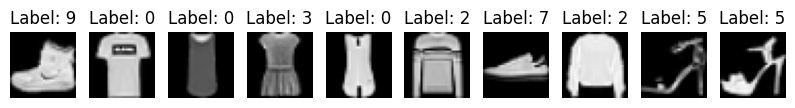

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

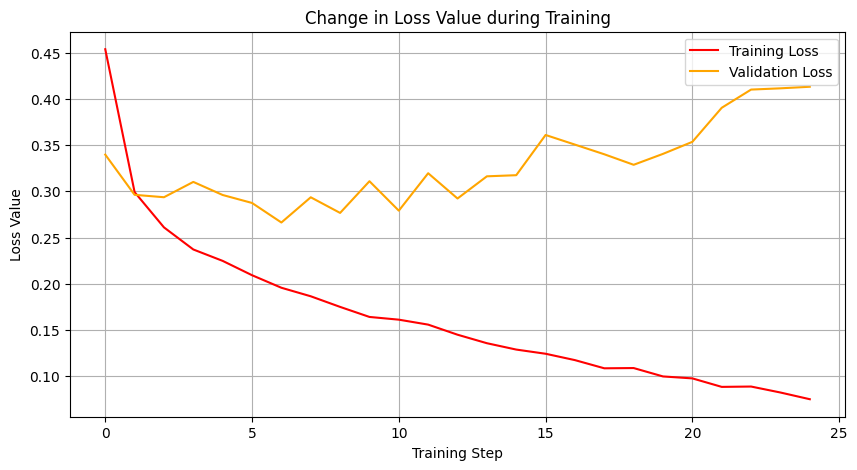

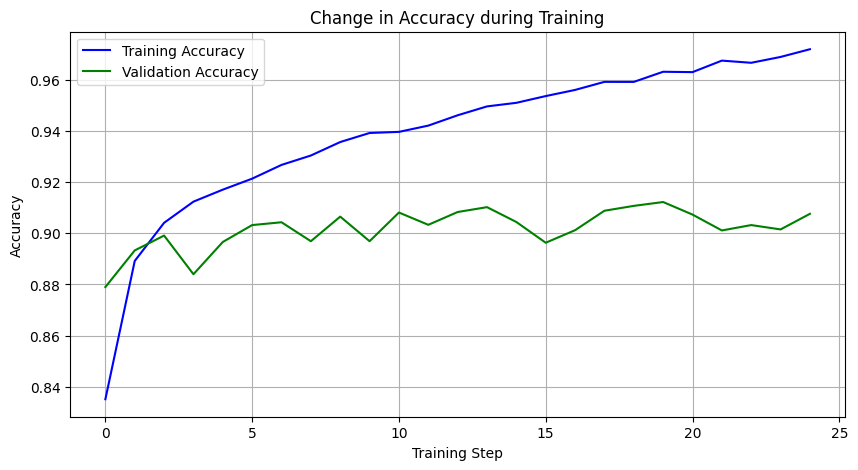

1875/1875 [==============================] - 14s 8ms/step - loss: 0.0863 - accuracy: 0.9663
Train accuracy: 0.9663166403770447
313/313 [==============================] - 3s 8ms/step - loss: 0.3406 - accuracy: 0.9122
Test accuracy: 0.9121999740600586


In [ ]:
#Version 4. layer block5_conv1 Retrained

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import numpy as np
from PIL import Image

tf.config.optimizer.set_jit(True)

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Function to resize images and convert to RGB format
def resize_images(images):
    resized_images = []
    for img in images:
        # Resize the image to 32x32 using bilinear interpolation
        img_resized = np.array(Image.fromarray(img).resize((32, 32), Image.BILINEAR))
        # Convert grayscale to RGB format by replicating the single channel
        img_rgb = np.repeat(img_resized[:, :, np.newaxis], 3, axis=2)
        resized_images.append(img_rgb)
    return np.array(resized_images)

# Upscale training and test images
x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

# Display any 10 photos from x_train_resized
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_resized[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.axis('off')  # Turn off axis
    plt.title(f'Label: {y_train[i]}')  # Display label of the image
plt.show()

# Load VGG16 model (excluding top layers)
vgg16= VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

vgg16.summary()

# Retrain layer block5_conv1
vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Build the model
model = tf.keras.Sequential([
   vgg16,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(10, activation="softmax"),
])
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train_resized, y_train, epochs=50, batch_size=256,
                    validation_data=(x_test_resized, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train_resized, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_acc}')

# Version *5*

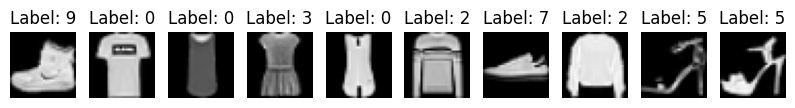

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

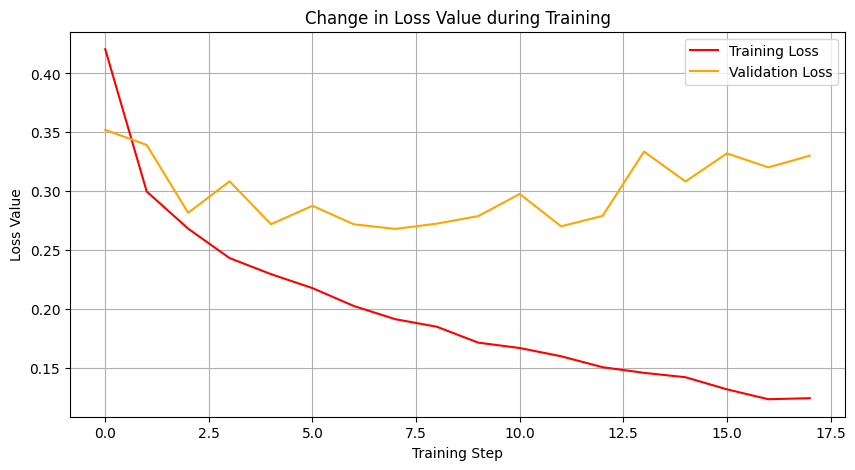

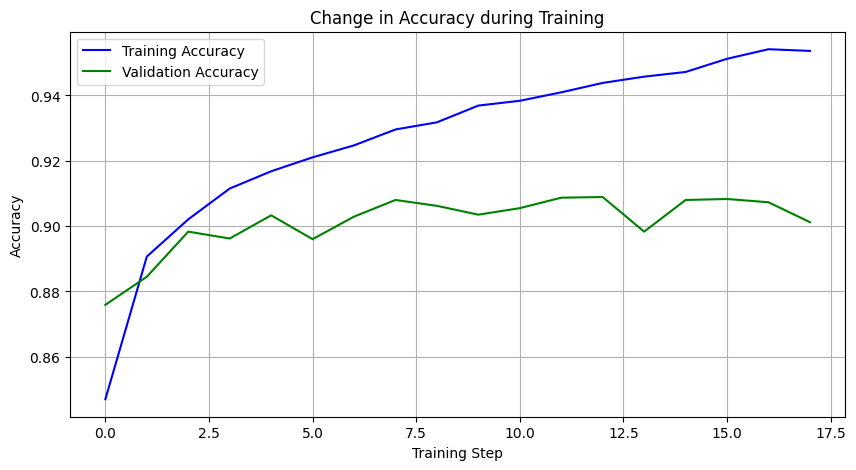

1875/1875 [==============================] - 14s 7ms/step - loss: 0.1349 - accuracy: 0.9507
Train accuracy: 0.9507499933242798
313/313 [==============================] - 2s 8ms/step - loss: 0.2790 - accuracy: 0.9089
Test accuracy: 0.9089000225067139


In [ ]:
#Version 5. Batch size decreased from 256 to 128

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import numpy as np
from PIL import Image

tf.config.optimizer.set_jit(True)

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Function to resize images and convert to RGB format
def resize_images(images):
    resized_images = []
    for img in images:
        # Resize the image to 32x32 using bilinear interpolation
        img_resized = np.array(Image.fromarray(img).resize((32, 32), Image.BILINEAR))
        # Convert grayscale to RGB format by replicating the single channel
        img_rgb = np.repeat(img_resized[:, :, np.newaxis], 3, axis=2)
        resized_images.append(img_rgb)
    return np.array(resized_images)

# Upscale training and test images
x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

# Display any 10 photos from x_train_resized
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_resized[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.axis('off')  # Turn off axis
    plt.title(f'Label: {y_train[i]}')  # Display label of the image
plt.show()

# Load VGG16 model (excluding top layers)
vgg16= VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

vgg16.summary()

# Retrain layer block5_conv1
vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# Build the model
model = tf.keras.Sequential([
   vgg16,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(10, activation="softmax"),
])
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train_resized, y_train, epochs=50, batch_size=128,
                    validation_data=(x_test_resized, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train_resized, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_acc}')

# Version 6

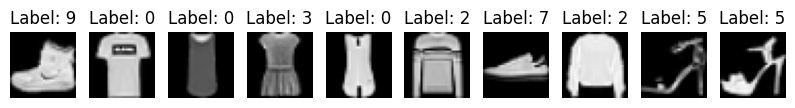

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

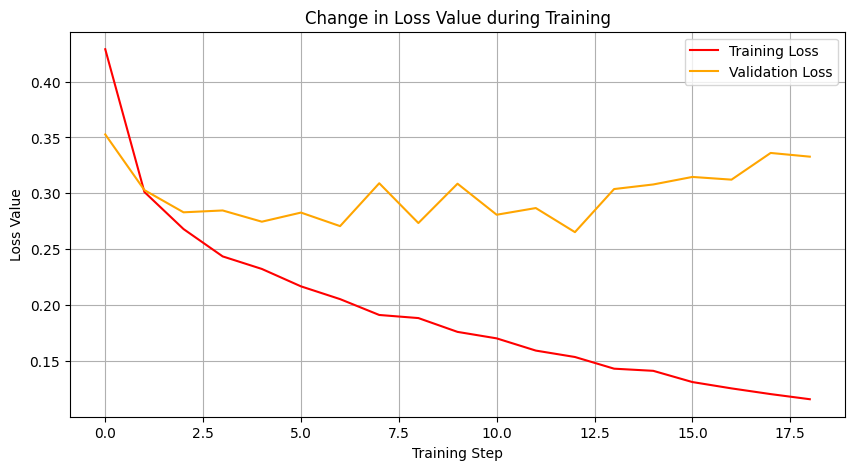

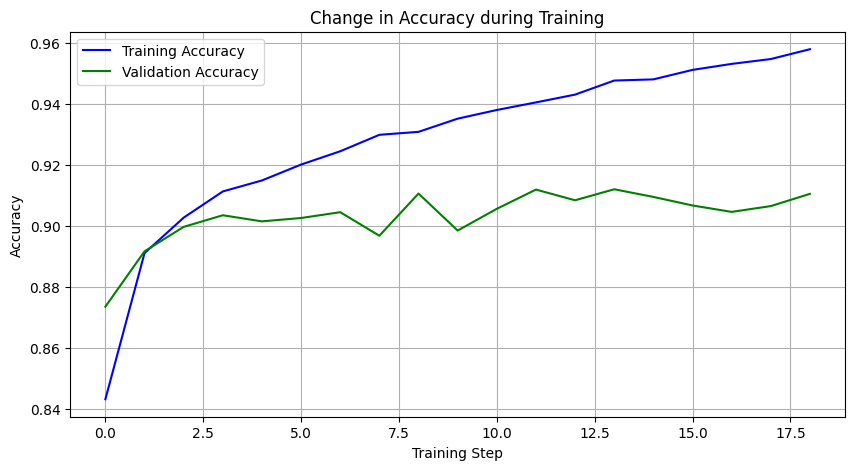

1875/1875 [==============================] - 14s 8ms/step - loss: 0.1208 - accuracy: 0.9560
Train accuracy: 0.9560333490371704
313/313 [==============================] - 2s 7ms/step - loss: 0.3038 - accuracy: 0.9120
Test accuracy: 0.9120000004768372


In [ ]:
#Version 6. Layer block 5 all three modiules are retrained

import tensorflow as tf
from tensorflow import keras
from keras import models
from keras import layers
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
import numpy as np
from PIL import Image

tf.config.optimizer.set_jit(True)

# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Function to resize images and convert to RGB format
def resize_images(images):
    resized_images = []
    for img in images:
        # Resize the image to 32x32 using bilinear interpolation
        img_resized = np.array(Image.fromarray(img).resize((32, 32), Image.BILINEAR))
        # Convert grayscale to RGB format by replicating the single channel
        img_rgb = np.repeat(img_resized[:, :, np.newaxis], 3, axis=2)
        resized_images.append(img_rgb)
    return np.array(resized_images)

# Upscale training and test images
x_train_resized = resize_images(x_train)
x_test_resized = resize_images(x_test)

# Display any 10 photos from x_train_resized
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_resized[i], cmap='gray')  # Use cmap='gray' for grayscale images
    plt.axis('off')  # Turn off axis
    plt.title(f'Label: {y_train[i]}')  # Display label of the image
plt.show()

# Load VGG16 model (excluding top layers)
vgg16= VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

vgg16.summary()

# Retrain layer block5_conv1
vgg16.trainable = True
set_trainable = False
for layer in vgg16.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if layer.name == "block5_conv2":
        set_trainable = True
    if layer.name == "block5_conv3":
        set_trainable = True
    if set_trainable:
        layer.trainable = True


    else:
        layer.trainable = False

# Build the model
model = tf.keras.Sequential([
   vgg16,
   layers.Flatten(),
   layers.Dense(256, activation="relu"),
   layers.Dense(10, activation="softmax"),
])
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Train the model and save history
history = model.fit(x_train_resized, y_train, epochs=50, batch_size=128,
                    validation_data=(x_test_resized, y_test), callbacks=[early_stopping])

# Extract loss and accuracy history
loss_history = history.history['loss']
accuracy_history = history.history['accuracy']
val_loss_history = history.history['val_loss']
val_accuracy_history = history.history['val_accuracy']

# Plot loss history
plt.figure(figsize=(10, 5))
plt.plot(loss_history, label='Training Loss', color='red')
plt.plot(val_loss_history, label='Validation Loss', color='orange')
plt.xlabel('Training Step')
plt.ylabel('Loss Value')
plt.title('Change in Loss Value during Training')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy history
plt.figure(figsize=(10, 5))
plt.plot(accuracy_history, label='Training Accuracy', color='blue')
plt.plot(val_accuracy_history, label='Validation Accuracy', color='green')
plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Change in Accuracy during Training')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on the train set
test_loss, test_acc = model.evaluate(x_train_resized, y_train)
print(f'Train accuracy: {test_acc}')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f'Test accuracy: {test_acc}')

# Висновок

При використанні перенесення навчання на заделагіть натреновану модель VGG16 дає непоганній результат у разі разморозки та пренавчання деяких внутрішніх шарів. Зміни в топ рівнях мережі не презвели до значного покращення резултату. З інщого боку при використанні моделі VGG16 без разморозки рівнів дає більш стабілний результат - без перенавчання шо ми можем побачити на графіках точності та втрат для тренувальних та тестових данних. Нажаль в моєму випадку модель з перенесенням навчання дала трішки гірший результат ніж згорткова нейронна мережа.